# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

#### Question 1
First try to plot the temperature data

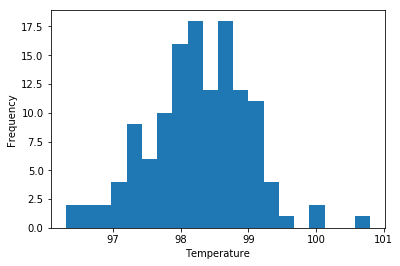

(0.9865770936012268, 0.233174666762352)

In [21]:
import matplotlib.pyplot as plt

df['temperature'].plot(kind='hist',bins=20)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show() 

From the frequency histogram, temperature looks symmetric; but it might have two peaks.
Now try to use the Q-Q plot.

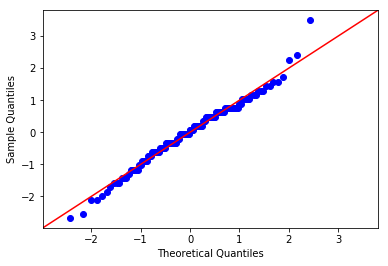

In [30]:
from statsmodels.graphics.gofplots import qqplot
qq=qqplot(df['temperature'],fit=True,line='45')
plt.show()

Most data points are on the Q-Q plot line; Now try some normality tests
#### Shapiro nomality test:

In [22]:
from scipy import stats

stats.shapiro(df['temperature'])

(0.9865770936012268, 0.233174666762352)

The second value is the p-value, which is very large so we cannot reject the null hypothesis; thus, this sampling data is normally distributed; since I found another test from scipy, just to try:

In [24]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The result to this question is the same but the p-value is different; I checked online for some insights about which to choose, and get an answer which points out that Shapiro test is more appropriate for sample size less than 50. https://datascience.stackexchange.com/questions/12846/how-to-decided-which-test-of-normality-to-use
So in this case, normaltest( ) is more useful and accurate.

#### Question 2
Since we have a sample size>30, according to the central limit theorom (CLT), the data is large enough to apply the CLT; and it is obvious that 130 would be far smaller than 10% of human counts, so we can consider the sampling process as identical and independent.

#### Question 3
First, try a bootstrap hypothesis test.
This would be an one-sample problem:
Null hypothesis: the mean of the data equals to the predetermined value 98.6 ∘F.

In [37]:
import numpy as np

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

shifted_temp=df['temperature']-np.mean(df['temperature'])+98.6
bs_replicates = draw_bs_reps(shifted_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000
print('p = ', p)

p =  0.0


Now try frequentis tests - 
this should be a one-sample test since it is comparing the sample mean to a value; 

Since we don't know the standard deviation of the hypothesized true mean, a t-test should be used: 

In [41]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

If a z-test is used:

In [43]:
from statsmodels.stats.weightstats import ztest
ztest(df['temperature'], value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The p-value of z-test is different from the t-test. This is because z-table and t-table have different distributions so the same test value will match to different probability.

#### Question 4

In [47]:
sample_10=np.random.choice(df['temperature'],size=10)
t_result=stats.ttest_1samp(sample_10, 98.6)
z_result=ztest(df['temperature'], value=98.6)
print("T-test result is "+str(t_result[1]))
print("Z-test result is "+str(z_result[1]))

T-test result is 0.21964011123819926
Z-test result is 4.9021570141012155e-08


T-test is the correct one to use since the sample size is very small (<30) and we don't know the STD of true mean; The result of t-test and z-test of the 10 samples shows that the conclusion to reject the null hypothesis, at least to some extend, relies on the right test table to use for p-values; z-test result and t-test result can sometimes give us opposite conclusions.

#### Question 5
First use the frequentist approach to get 95% CI of the data with a critical z value=1.96:

In [54]:
st_error=np.std(df['temperature'])/np.sqrt(len(df['temperature']))
margin=1.96*st_error
mean=np.mean(df['temperature'])
CI=(mean-margin,mean+margin)
CI

(98.12367980442819, 98.37478173403336)

Now use the bootstrap approach, which simulate 10,000 times of the mean and calculate the range of temperatures that captures 95% of the data: 

In [49]:
bs_replicates_mean=draw_bs_reps(df['temperature'], np.mean, 10000)
interval=np.percentile(bs_replicates_mean,[2.5,97.5])
low=str(round(interval[0],2))
high=str(round(interval[1],2))
print("If the temperature of a person is out of "+low+" to "+high+" ∘F, then the temperature is abnormal")

If the temperature of a person is out of 98.12 to 98.37 ∘F, then the temperature is abnormal


#### Question 6
To examine the temperature difference between females and males, we can do a two-sample t-test:

In [58]:
df[df['gender']=='F']

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [63]:
female_temp=np.array(df[df['gender']=='F']['temperature'])
male_temp=np.array(df[df['gender']=='M']['temperature'])
stats.ttest_ind(female_temp,male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

Since the p-value is less than 0.05, I can reject the null hypothesis that female and male have same mean temperatures; the conclusion is that there is difference in temperatures between females and males.
I checked the mean temperature for female and male, both are less than 98.6, so even males might have higher mean temperatures than females, afterall the mean temperature is less than 98.6.